# EUROPE ENERGY: Coursework Assignment 2
Riya Haran, MSc Data Science

# 1. Introduction 

## 1.1 Background and Objectives

In the wake of the Ukraine war, the issues of price and sufficient access to energy are main topics in Europe as of today. Europe is largely dependent on fossil fuels, not least Russian natural gas, and there are concerns about how energy needs can be secured in the long term.

It is evident that European gas production is in decline. Several North Sea gas deposits are running dry, as are a number of gas fields in the Netherlands, leaving Europe dependent on gas imports, primarily from Russia and Norway.

The aim is to unfold the history of utilisation and generation of various energy sources by European countries to understand how they've hit crisis in 2022. Based on the available information, Russia is fulfilling its long-term contracts with European counterparts – but its exports to Europe are down from their 2019 level.

So, the below analysis defines:
1. Keeping in mind about climate change being the other biggest challenge caused by the extreme utilization of fossil fuels that cause greenhouse gas emissions. I start by analysing the amount of CO2 and greenhouse gas emissions by European countries and on EU level over a time span to see if there have been any fluctuations in the concentrations of these emissions. Further, I try to examine if electricity generation is the biggest factor of these countries emitting highest emissions. 
        
2. To explore fossil fuels supply, demand, and usage - focusing on how largest fossil fuel consumer countries produce/ utilize coal, oil, gas and inspect if they really do have a high fossil fuel demand that they themselves can't fulfill. 

3. Inspecting two main topics:
- From (2), it was found that the gas production in these top 5 fossil fuel users/ producer countries is very low  with some countries dropping to extreme low levels. To understand whether its the same condition on EU level, we do further analysis. 
- Understanding Russia's production and consumption of fossil fuels to compare it with Europe's to cross-check and understand Russia's influence and dependency on Europe for these fuels.

4. Twitter Sentiment analysis: captures what's being said about Europe energy and the crisis it's facing in 2022. Sentiment analysis helps in understading how the world feels about this by determining whether the sentiment conveyed in the tweets is positive, negative or neutral. 

5. Investigating how Europe was moving more towards renewables and cleaner energy and how will it survive to move towards it faster despite tightening government budgets and the growing costs of some green technologies.

The motive lies in inspecting and analysing EU's past 20 years data to check if it'll take this crisis more as an opportunity to shift towards reducing carbon footprint as planned by European Green Deal or would it halt the roadmap to a cleaner energy future. From the analysis, I believe that Europe’s energy crisis is a short-term blow to its transition away from fossil fuels.

The world lacks safe, low-carbon, and cheap large-scale energy alternatives to fossil fuels and I believe the same and it inspired me to take this as my topic. To analyse the entire world's data would've been unachievable given the time limitations and hence, I decided to analyse EU's energy data as Europe Energy Crisis is one of the biggest problem today.

## 1.2 About the Data & Ethics

The dataset used for the analysis was downloaded from Github: https://github.com/owid/energy-data. The dataset is collected and maintained by Our World in Data, a non-profit organization based in the UK. 
Data produced by Our World in Data are completely open access under the Creative Commons BY license. 
They mentioned 'Reuse this data freely' - stating, "You have the permission to use, distribute, and reproduce these in any medium, provided the source and authors are credited."

'Our World in Data' believes that "to make sure that everyone in the world has access to clean and safe energy, we need to understand energy consumption and its impacts around the world today and how this has changed over time."

Dataset entails data from 1900-2021 from all over the world on: country, year, population, gdp, biofuel, carbon intensity, electricity demand, eelctricity generation, primary energy, fossil fuels, coal, oil, gas, greenhouse gas, low carbon, hydro power, nuclear, renewable, other renewable energy, solar, and wind energy. 

# 2. Data Cleaning, Preprocessing, EDA

**Libraries used**

In [1]:
# importing analysis tools
import numpy as np 
import pandas as pd 
import os 
import missingno as msno


# importing plotting tools
import matplotlib
import matplotlib.pyplot as plt
import os 
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# mute warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the file
energy = pd.read_csv(r"./energy-data.csv")
energy.head(2)

country  year iso_code  population  gdp  biofuel_cons_change_pct  \
0  Afghanistan  1900      AFG   4832414.0  NaN                      NaN   
1  Afghanistan  1901      AFG   4879685.0  NaN                      NaN   

   biofuel_cons_change_twh  biofuel_cons_per_capita  biofuel_consumption  \
0                      NaN                      NaN                  NaN   
1                      NaN                      NaN                  NaN   

   biofuel_elec_per_capita  ...  solar_share_elec  solar_share_energy  \
0                      NaN  ...               NaN                 NaN   
1                      NaN  ...               NaN                 NaN   

   wind_cons_change_pct  wind_cons_change_twh  wind_consumption  \
0                   NaN                   NaN               NaN   
1                   NaN                   NaN               NaN   

   wind_elec_per_capita  wind_electricity  wind_energy_per_capita  \
0                   NaN               NaN                     NaN   
1                   NaN               NaN                     NaN   

   wind_share_elec  wind_share_energy  
0              NaN                NaN  
1              NaN                NaN  

[2 rows x 129 columns]

## 2.1 Data cleaning

As part of the data preparation, cleaning the data allows for accurate, defensible data that'll help generate reliable visualizations, models, and business decisions.
Codes below cleans the dataset that might entail various significant inconsistencies like duplicates, missing values and irrelevant data.

In [3]:
# Replacing all values as NaN to zero
# Typecasting: GDP datatype to int
energy['gdp']= energy['gdp'].fillna(0)
energy['gdp']=energy['gdp'].astype(np.int64)

# Converting all NaN values to zero throughout the dataset
energy.iloc[:,3:129]= energy.iloc[:,3:129].replace(np.nan,0)
energy.iloc[:,3:129].head(2)

population  gdp  biofuel_cons_change_pct  biofuel_cons_change_twh  \
0   4832414.0    0                      0.0                      0.0   
1   4879685.0    0                      0.0                      0.0   

   biofuel_cons_per_capita  biofuel_consumption  biofuel_elec_per_capita  \
0                      0.0                  0.0                      0.0   
1                      0.0                  0.0                      0.0   

   biofuel_electricity  biofuel_share_elec  biofuel_share_energy  ...  \
0                  0.0                 0.0                   0.0  ...   
1                  0.0                 0.0                   0.0  ...   

   solar_share_elec  solar_share_energy  wind_cons_change_pct  \
0               0.0                 0.0                   0.0   
1               0.0                 0.0                   0.0   

   wind_cons_change_twh  wind_consumption  wind_elec_per_capita  \
0                   0.0               0.0                   0.0   
1                   0.0               0.0                   0.0   

   wind_electricity  wind_energy_per_capita  wind_share_elec  \
0               0.0                     0.0              0.0   
1               0.0                     0.0              0.0   

   wind_share_energy  
0                0.0  
1                0.0  

[2 rows x 126 columns]

In [4]:
# Number of unique values in each variable

for var in energy:
    print(f'{var}: {energy[var].nunique()}')

country: 306
year: 122
iso_code: 219
population: 18041
gdp: 11114
biofuel_cons_change_pct: 778
biofuel_cons_change_twh: 743
biofuel_cons_per_capita: 614
biofuel_consumption: 798
biofuel_elec_per_capita: 2557
biofuel_electricity: 1028
biofuel_share_elec: 2038
biofuel_share_energy: 607
carbon_intensity_elec: 3937
coal_cons_change_pct: 4645
coal_cons_change_twh: 4174
coal_cons_per_capita: 4453
coal_consumption: 4822
coal_elec_per_capita: 2695
coal_electricity: 2631
coal_prod_change_pct: 7605
coal_prod_change_twh: 6584
coal_prod_per_capita: 8062
coal_production: 7848
coal_share_elec: 3054
coal_share_energy: 4679
electricity_demand: 3336
electricity_generation: 4723
electricity_share_energy: 3272
energy_cons_change_pct: 8841
energy_cons_change_twh: 8757
energy_per_capita: 10126
energy_per_gdp: 3258
fossil_cons_change_pct: 4724
fossil_cons_change_twh: 5233
fossil_elec_per_capita: 5559
fossil_electricity: 3582
fossil_energy_per_capita: 4840
fossil_fuel_consumption: 5491
fossil_share_elec: 459

In [5]:
# Checking duplicate values

print('Number of Duplicates in the dataset: {}'.format(len(energy[energy.duplicated()])))

Number of Duplicates in the dataset: 0


## 2.2 Creating specific DataFrames

Creating two main data frames:
1. eur_energy: Europe(data of all countries combined) - 2000-2021
2. eur_co_energy: European Countries - 2000-2021

In [6]:
# Creating our data frame
# eur_energy: Europe(data of all countries combined) - 2000-2021
eur_energy = energy[(energy['country']=='Europe')&(energy['year']>=2000)]
eur_energy.head(2)

country  year iso_code   population  gdp  biofuel_cons_change_pct  \
6568  Europe  2000      NaN  727919596.0    0                      0.0   
6569  Europe  2001      NaN  727846044.0    0                      0.0   

      biofuel_cons_change_twh  biofuel_cons_per_capita  biofuel_consumption  \
6568                      0.0                      0.0                  0.0   
6569                      0.0                      0.0                  0.0   

      biofuel_elec_per_capita  ...  solar_share_elec  solar_share_energy  \
6568                   47.423  ...             0.003               0.001   
6569                   50.739  ...             0.005               0.002   

      wind_cons_change_pct  wind_cons_change_twh  wind_consumption  \
6568                57.554                24.207            66.267   
6569                19.883                12.660            78.927   

      wind_elec_per_capita  wind_electricity  wind_energy_per_capita  \
6568                30.580             22.26                  91.036   
6569                36.766             26.76                 108.439   

      wind_share_elec  wind_share_energy  
6568            0.517              0.213  
6569            0.610              0.250  

[2 rows x 129 columns]

In [7]:
# renaming country column to continent
eur_energy.rename(columns={'country': 'continent'}, inplace=True)
eur_energy.head(2)

continent  year iso_code   population  gdp  biofuel_cons_change_pct  \
6568    Europe  2000      NaN  727919596.0    0                      0.0   
6569    Europe  2001      NaN  727846044.0    0                      0.0   

      biofuel_cons_change_twh  biofuel_cons_per_capita  biofuel_consumption  \
6568                      0.0                      0.0                  0.0   
6569                      0.0                      0.0                  0.0   

      biofuel_elec_per_capita  ...  solar_share_elec  solar_share_energy  \
6568                   47.423  ...             0.003               0.001   
6569                   50.739  ...             0.005               0.002   

      wind_cons_change_pct  wind_cons_change_twh  wind_consumption  \
6568                57.554                24.207            66.267   
6569                19.883                12.660            78.927   

      wind_elec_per_capita  wind_electricity  wind_energy_per_capita  \
6568                30.580             22.26                  91.036   
6569                36.766             26.76                 108.439   

      wind_share_elec  wind_share_energy  
6568            0.517              0.213  
6569            0.610              0.250  

[2 rows x 129 columns]

In [8]:
# eur_co_energy: European Countries - 2000-2021
eur_co_energy=energy[((energy['country']=='Germany')| (energy['country']=='United Kingdom')| (energy['country']=='France')|
                     (energy['country']=='Italy')| (energy['country']=='Spain')| (energy['country']=='Ukraine')|
                     (energy['country']=='Poland')| (energy['country']=='Romania')| (energy['country']=='Netherlands')|
                     (energy['country']=='Belgium')| (energy['country']=='Czechia')| (energy['country']=='Greece')|
                     (energy['country']=='Portugal')| (energy['country']=='Sweden')| (energy['country']=='Hungary')|
                     (energy['country']=='Belarus')| (energy['country']=='Austria')| (energy['country']=='Serbia')|
                     (energy['country']=='Switzerland')| (energy['country']=='Bulgaria')| (energy['country']=='Denmark')|
                     (energy['country']=='Finland')| (energy['country']=='Slovakia')| (energy['country']=='Norway')|
                     (energy['country']=='Ireland')| (energy['country']=='Croatia')| (energy['country']=='Moldova')|
                     (energy['country']=='Bosnia and Herzegovina')| (energy['country']=='Albania')| (energy['country']=='Lithuania')|
                     (energy['country']=='North Macedonia')| (energy['country']=='Slovenia')| (energy['country']=='Latvia')|
                     (energy['country']=='Estonia')| (energy['country']=='Montenegro')| (energy['country']=='Luxembourg')|
                     (energy['country']=='Malta')| (energy['country']=='Iceland')| (energy['country']=='Andorra')|
                     (energy['country']=='Monaco')| (energy['country']=='Liechtenstein')| (energy['country']=='San Marino')|
                     (energy['country']=='Holy See'))& (energy['year']>=2000)]
eur_co_energy.tail(2)

country  year iso_code  population  gdp  \
20521  United Kingdom  2020      GBR  67059472.0    0   
20522  United Kingdom  2021      GBR  67281040.0    0   

       biofuel_cons_change_pct  biofuel_cons_change_twh  \
20521                   -5.498                   -1.049   
20522                  -11.247                   -2.027   

       biofuel_cons_per_capita  biofuel_consumption  biofuel_elec_per_capita  \
20521                  268.752               18.022                  568.152   
20522                  237.740               15.995                  581.144   

       ...  solar_share_elec  solar_share_energy  wind_cons_change_pct  \
20521  ...             4.332               1.762                18.142   
20522  ...             4.082               1.625               -14.475   

       wind_cons_change_twh  wind_consumption  wind_elec_per_capita  \
20521                29.779           197.941              1100.963   
20522               -29.271           168.670               956.585   

       wind_electricity  wind_energy_per_capita  wind_share_elec  \
20521             73.83                2951.726           24.013   
20522             64.36                2506.943           21.067   

       wind_share_energy  
20521             10.093  
20522              8.458  

[2 rows x 129 columns]

## 2.3 EDA

Exploratory Data Analysis (EDA) helps one analyze datasets to summarize their main characteristics, often with visual methods. The goal is to explore, investigate and learn, as opposed to confirming statistical hypotheses and hence, I began with the same.

In [9]:
# Column descriptive statistics

eur_energy.describe(include="all")

continent         year iso_code    population   gdp  \
count         22    22.000000        0  2.200000e+01  22.0   
unique         1          NaN        0           NaN   NaN   
top       Europe          NaN      NaN           NaN   NaN   
freq          22          NaN      NaN           NaN   NaN   
mean         NaN  2010.500000      NaN  7.375453e+08   0.0   
std          NaN     6.493587      NaN  7.296652e+06   0.0   
min          NaN  2000.000000      NaN  7.278460e+08   0.0   
25%          NaN  2005.250000      NaN  7.302218e+08   0.0   
50%          NaN  2010.500000      NaN  7.380735e+08   0.0   
75%          NaN  2015.750000      NaN  7.442139e+08   0.0   
max          NaN  2021.000000      NaN  7.474635e+08   0.0   

        biofuel_cons_change_pct  biofuel_cons_change_twh  \
count                      22.0                     22.0   
unique                      NaN                      NaN   
top                         NaN                      NaN   
freq                        NaN                      NaN   
mean                        0.0                      0.0   
std                         0.0                      0.0   
min                         0.0                      0.0   
25%                         0.0                      0.0   
50%                         0.0                      0.0   
75%                         0.0                      0.0   
max                         0.0                      0.0   

        biofuel_cons_per_capita  biofuel_consumption  biofuel_elec_per_capita  \
count                      22.0                 22.0                22.000000   
unique                      NaN                  NaN                      NaN   
top                         NaN                  NaN                      NaN   
freq                        NaN                  NaN                      NaN   
mean                        0.0                  0.0               169.356227   
std                         0.0                  0.0                80.348869   
min                         0.0                  0.0                47.423000   
25%                         0.0                  0.0               100.394750   
50%                         0.0                  0.0               175.113000   
75%                         0.0                  0.0               243.866500   
max                         0.0                  0.0               282.750000   

        ...  solar_share_elec  solar_share_energy  wind_cons_change_pct  \
count   ...         22.000000           22.000000             22.000000   
unique  ...               NaN                 NaN                   NaN   
top     ...               NaN                 NaN                   NaN   
freq    ...               NaN                 NaN                   NaN   
mean    ...          1.277045            0.532000             17.913318   
std     ...          1.341302            0.558789             12.864193   
min     ...          0.003000            0.001000             -2.978000   
25%     ...          0.037250            0.015250             11.699750   
50%     ...          0.741500            0.310500             15.927500   
75%     ...          2.375250            0.986000             20.628500   
max     ...          3.832000            1.617000             57.554000   

        wind_cons_change_twh  wind_consumption  wind_elec_per_capita  \
count              22.000000         22.000000             22.000000   
unique                   NaN               NaN                   NaN   
top                      NaN               NaN                   NaN   
freq                     NaN               NaN                   NaN   
mean               54.543727        553.690727            276.636409   
std                48.940194        397.064765            203.880954   
min               -42.829000         66.267000             30.580000   
25%                28.684000        213.252000            102.129750   
50%                

In [10]:
# Column descriptive statistics

eur_co_energy.describe(include="all")

country         year iso_code    population           gdp  \
count         830   830.000000      830  8.300000e+02  8.300000e+02   
unique         38          NaN       38           NaN           NaN   
top     Lithuania          NaN      LTU           NaN           NaN   
freq           22          NaN       22           NaN           NaN   
mean          NaN  2010.538554      NaN  1.562042e+07  4.078843e+11   
std           NaN     6.325153      NaN  2.085641e+07  7.228154e+11   
min           NaN  2000.000000      NaN  2.814690e+05  0.000000e+00   
25%           NaN  2005.000000      NaN  3.180490e+06  2.350899e+10   
50%           NaN  2011.000000      NaN  7.542518e+06  1.332377e+11   
75%           NaN  2016.000000      NaN  1.111271e+07  3.622058e+11   
max           NaN  2021.000000      NaN  8.340856e+07  3.885961e+12   

        biofuel_cons_change_pct  biofuel_cons_change_twh  \
count                830.000000               830.000000   
unique                      NaN                      NaN   
top                         NaN                      NaN   
freq                        NaN                      NaN   
mean                  15.634596                 0.205059   
std                  203.968073                 1.327750   
min                 -100.000000               -13.850000   
25%                    0.000000                 0.000000   
50%                    0.000000                 0.000000   
75%                    0.000000                 0.000000   
max                 5659.328000                13.001000   

        biofuel_cons_per_capita  biofuel_consumption  biofuel_elec_per_capita  \
count                830.000000           830.000000               830.000000   
unique                      NaN                  NaN                      NaN   
top                         NaN                  NaN                      NaN   
freq                        NaN                  NaN                      NaN   
mean                  94.344199             2.739313               215.586848   
std                  223.253121             6.879090               384.728682   
min                    0.000000             0.000000                 0.000000   
25%                    0.000000             0.000000                 4.362250   
50%                    0.000000             0.000000                60.490000   
75%                   28.881250             0.819000               246.403250   
max                 1747.467000            39.271000              2406.938000   

        ...  solar_share_elec  solar_share_energy  wind_cons_change_pct  \
count   ...        830.000000          830.000000            830.000000   
unique  ...               NaN                 NaN                   NaN   
top     ...               NaN                 NaN                   NaN   
freq    ...               NaN                 NaN                   NaN   
mean    ...          1.077908            0.378670             31.561325   
std     ...          2.307967            0.791475            132.921030   
min     ...          0.000000            0.000000           -100.000000   
25%     ...          0.000000            0.000000              0.000000   
50%     ...          0.007000            0.004000              8.185000   
75%     ...          0.942500            0.272750             29.922750   
max     ...         17.986000            4.623000           3300.000000   

        wind_cons_change_twh  wind_consumption  wind_elec_per_capita  \
count             830.000000        830.000000            830.000000   
unique                   NaN               NaN                   NaN   
top                      NaN               NaN                   NaN   
freq                     NaN               NaN                   NaN   
mean                1.430496         14.631888            265.866636   
std                 5.382464         37.787859            466.799103   
min               -38.955000          0.000000            

In [11]:
#checking unique values for country if they have data for years 2000-2021

eur_co_energy["country"].value_counts().head()

Lithuania      22
Austria        22
Malta          22
Moldova        22
Netherlands    22
Name: country, dtype: int64

**European countries Population(in millions): 2000-2021**

Bubble size describe the population in millions.

In [12]:
# population of European countries over the years
fig = px.scatter_geo(eur_co_energy, locations="country", color="population",
                     hover_name="country", size="population",
                     animation_frame="year",locationmode="country names", color_continuous_scale=px.colors.diverging.BrBG,
                     scope="europe")
fig.show()

It is evident from the Europe map how population across EU has tranformed in the past 20 years. European population is increasing with these countries have the largest population(in millions): Germany, United Kingdom, France, Italy, Spain, Ukraine, and Poland. 

**European countries GDP: 2000-2021**

In [13]:
# Euopean Countries with their GDP
fig = px.scatter_geo(eur_co_energy, locations="country", color="gdp",
                     hover_name="country", size="gdp",
                     animation_frame="year",locationmode="country names", color_continuous_scale=px.colors.diverging.BrBG,
                     scope="europe")
fig.show()

The map above illustrates how Europe's GDP i.e Total real gross domestic product, inflation-adjusted has changed throughout history.  

Over the years, there has been major economic growth all across EU.

# 3. Target based Analysis - Greenhouse Gas Emissions

Target based Analysis helped examine potential targetted variables to assess which variables were most and least valuable to my research objectives.
Examining Greenhouse-gas emissions produced in the generation of electricity, measured in million tonnes of CO2 equivalent.
Focusing on further analysing top 5 countries who emit the most greenhouse gas.

## 3.1 European countries - emissions

CO2 emissions have increased by about 90%, with emissions from fossil fuel combustion and industrial processes contributing about 78% of the total greenhouse gas emissions increase 
Greenhouse Gas Emissions produced in electicity generation over EU:

In [14]:
# Plotting greenhouse gas emissions from 2000-2021 from European countries
eur_gg_emi = eur_co_energy[['country', 'year', 'greenhouse_gas_emissions']].groupby(['country','year']).sum().reset_index()

px.choropleth(data_frame=eur_gg_emi, locations="country", locationmode="country names", animation_frame="year",
              color="greenhouse_gas_emissions", color_continuous_scale=px.colors.diverging.Geyser, scope="europe",
              title="Greenhouse Gas emissions from European countries: in million tonnes of CO2 equivalent")

Interestingly, The European Union (EU) has made good progress in reducing its greenhouse gas (GHG). Many countries have cut down their Greenhouse gas emissions as of 2021 as illustrated in the map above. 

Germany remains the top producer of greenhouse gas despite reducing its emissions from 322 million tonnes CO2 equivalent to 206 million tonnes of CO2 equivalent in 2021.
Suprisingly, despite a low populated country, Poland's emissions have had an insignificant reduction in emissions over 20 years - from 134 in 2000 reduced to 131 million tonnes CO2 equivalent.

In [15]:
# Creating DataFrame - Top 5 countries emitting highest Greenhouse gas emissions 
gg_top_c = eur_co_energy[(eur_co_energy['country']=='Germany')|
                       (eur_co_energy['country']=='United Kingdom')|
                       (eur_co_energy['country']=='Poland')|
                       (eur_co_energy['country']=='Spain')|
                       (eur_co_energy['country']=='Italy')]

## 3.2 Deeper dive - analysing top 5 countries with highest emissions

Analysing the top 5 countries with highest emissions to understand how much CO2 is released during each of these countries based on electricity generated, demand - overall and specifically from fossil fuels.

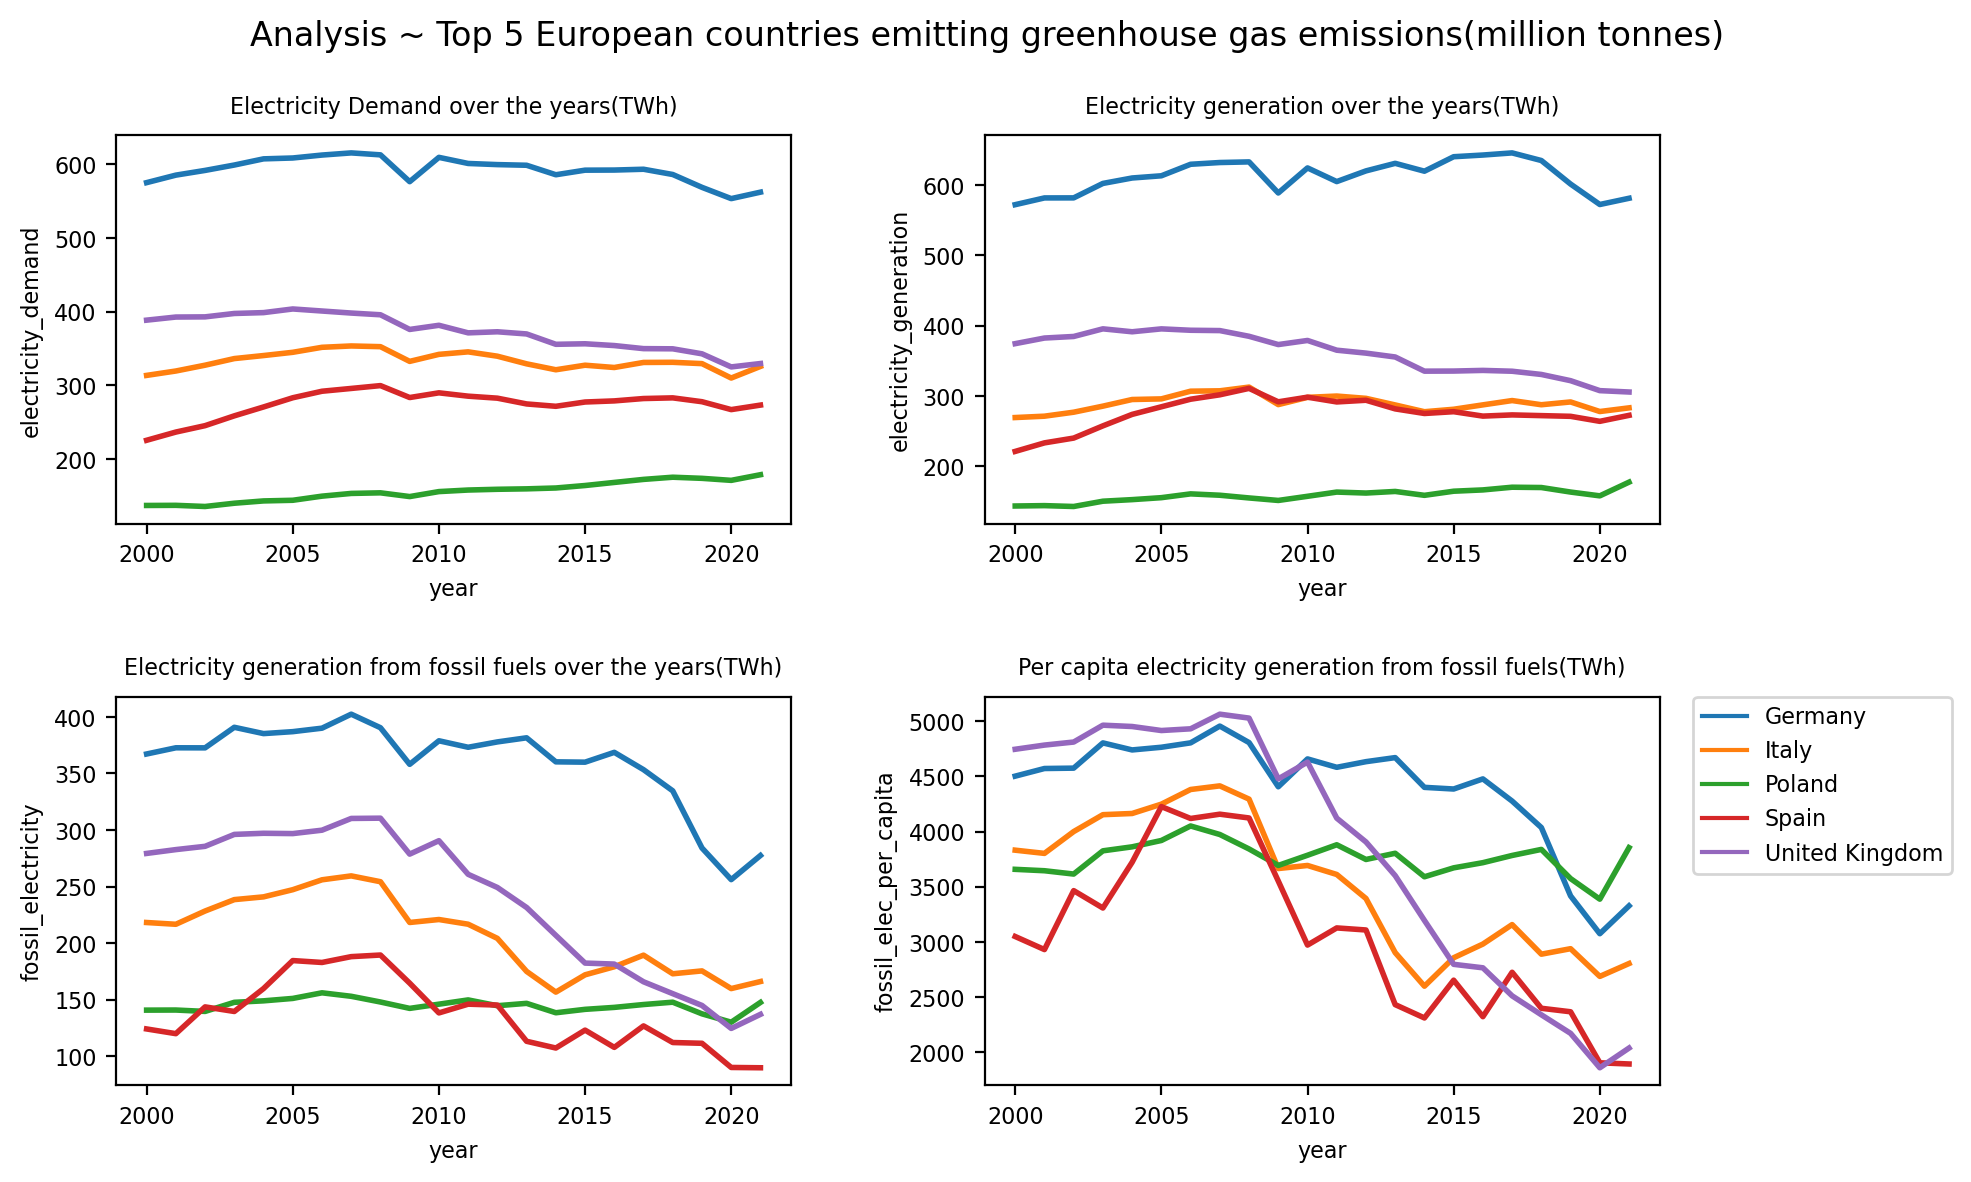

In [16]:
## Greenhouse gas emissions from top 5 countries and how its been over the years and what are the possible origins 

with plt.rc_context(rc = {'figure.dpi': 200, 'axes.labelsize': 8,
                          'xtick.labelsize': 8, 'ytick.labelsize': 8,'legend.fontsize': 8,
                          'legend.title_fontsize': 8, 'axes.titlesize': 8, 
                          'axes.titlepad': 8}):
    
    fig_4, ax_4 = plt.subplots(2, 2, figsize = (10,6))
    ax_flat = ax_4.flatten()
    
    ## 1st graph
    sns.lineplot(ax=ax_flat[0], data = gg_top_c,
                 x='year', y='electricity_demand', legend = None,
                 hue='country',lw=2).set_title('Electricity Demand over the years(TWh)')
    
    ## 2nd graph
    sns.lineplot(ax=ax_flat[1], data = gg_top_c,
                 x='year', y='electricity_generation', legend = None,
                 hue='country',lw=2).set_title('Electricity generation over the years(TWh)')
    
    ## 3rd graph
    sns.lineplot(ax=ax_flat[2], data = gg_top_c,
                x='year', y='fossil_electricity', lw=2, legend = None,
                hue='country').set_title('Electricity generation from fossil fuels over the years(TWh)')
    
    ## 4th graph
    sns.lineplot(ax=ax_flat[3], data = gg_top_c,
                x='year', y='fossil_elec_per_capita',
                lw=2, hue='country').set_title('Per capita electricity generation from fossil fuels(TWh)')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=8)

    fig_4.suptitle("Analysis ~ Top 5 European countries emitting greenhouse gas emissions(million tonnes)")
    plt.tight_layout(pad=1.2, w_pad=3, h_pad=2)
    plt.show()

Electricity demand seems to have increased for these countries; however, electricity generation has reduced from 2015 to 2021.
To check whether greenhouse emissions are mainly from fossil fuels, the bottom graphs describe that over the years these countries have tried to reduce fossil fuel generation. As a known fact, electricity generation from fossil fuels have been dropping. 

This explains that these greenhouse gas emissions are reducing overall and these emissions don't seem to be from electricity generated using fossil fuels. 

Note: electricity demand still growing in these countries suggesting that even though they've reduced generating electricity using fossil fuels, these demands are possibly being fulfilled by Russia and Norway (their energy providers). 
The question is- with more electricity demand but reduced generation are these countries highly dependent on other countries importing them or does that mean these countries are generating electricity through renewable resources?

# 4. Target based Analysis - Fossil Fuels

## 4.1 Fossil fuels - generation & consumption

Examining top countries with highest fossil fuel production and consumption based on their population to deeply inspect their demand and consumption:
**Fossil fuel generation, European countries**

In [17]:
# Top European countries generating fossil fuels as of 2021
ordered_fe = eur_co_energy[eur_co_energy['year']==2021].sort_values(by='fossil_electricity',ascending=False)

# Years
years = eur_co_energy['year'].unique()

# List of top countries with largest fossil fuel generation for electricity 
top = ordered_fe['country'].head(20).unique()

list = []
for year in years:
    for cont in top:
        amount = eur_co_energy[eur_co_energy['country']==cont][eur_co_energy['year']==year]['fossil_electricity'].sum()
        list.extend([[cont, year, amount]])

global_fe = pd.DataFrame(list, columns=['country', 'year', 'fossil_electricity'])
plt.figure(figsize=(10,6))

fig = px.line(global_fe, x='year', y='fossil_electricity', color='country',                                         
        line_group='country', title='European countries with largest fossil fuel generation as of 2021, TWh', 
              color_discrete_sequence=px.colors.qualitative.G10)
fig.show()

<Figure size 720x432 with 0 Axes>

Positively, fossil fuel generation has been brought down by European countries. However, there are countries who are top electricity producers of fossil fuels despite reducing as per 2021: Germany, Italy, Poland, UK and Spain.
A very interesting insight that UK had a massive drop in fossil fuel generation (in TWh) from 2010.

**Fossil fuel consumption, European countries**

In [18]:
# Top European countries consuming fossil fuels as of 2021
ordered_ff = eur_co_energy[eur_co_energy['year']==2021].sort_values(by='fossil_fuel_consumption',ascending=False)

# Years
years = eur_co_energy['year'].unique()

# List of top countries with largest fossil fuel consumption 
top = ordered_ff['country'].head(20).unique()

list = []
for year in years:
    for cont in top:
        amount = eur_co_energy[eur_co_energy['country']==cont][eur_co_energy['year']==year]['fossil_fuel_consumption'].sum()
        list.extend([[cont, year, amount]])

global_ff = pd.DataFrame(list, columns=['country', 'year', 'fossil_fuel_consumption'])
plt.figure(figsize=(10,6))

fig = px.line(global_ff, x='year', y='fossil_fuel_consumption', color='country',                                         
        line_group='country', title='European countries with largest fossil fuel consumption as of 2021, TWh', 
              color_discrete_sequence=px.colors.qualitative.G10)
fig.show()

<Figure size 720x432 with 0 Axes>

The plot above depicts the top countries that consumed highest fossil fuel (in TWh) over last 20 years - coal, gas and oil combined.
Highest consumption comes from the same countries who are top producers of fossil fuels; however, the ranking is changed - Germany (remains 1st),UK, Italy, France, Poland, and Spain.

Further analysis - Plotting these top 5 countries with highest fossil fuel consumption to understand consumption and generation of coal, gas and oil individually.

These are the same 5 countriues with largest greenhouse gas emissions and hence we use the same dataframe as 'gg_top_c' (greenhouse gas emissions top countries) for further analysis. 

## 4.2 Deeper dive - analysing top 5 countries with largest fossil fuel consumption/ generation

### 4.2.1 Electicity Demand

**Electricity demand, over the years (in TWh)**

In [19]:
# Before everything, lets understand what elec ddemand is of these countries

fig = px.scatter(gg_top_c, x="year", y="electricity_demand",
                 color="country", size = 'population',
                 hover_name="country", log_x=True, size_max=20)
fig.update_layout(height=500, width=800, title_text="Electricity Demand: Countries over the years (TWh)")
fig.show()

Germany has the highest electricity demand (562 Terawatt-hours) considering its densely populated, followed by UK, Italy, Spain and Poland.
Italy and UK have almost similar electricity demand despite Italy having less population.

### 4.2.2 Role of Coal

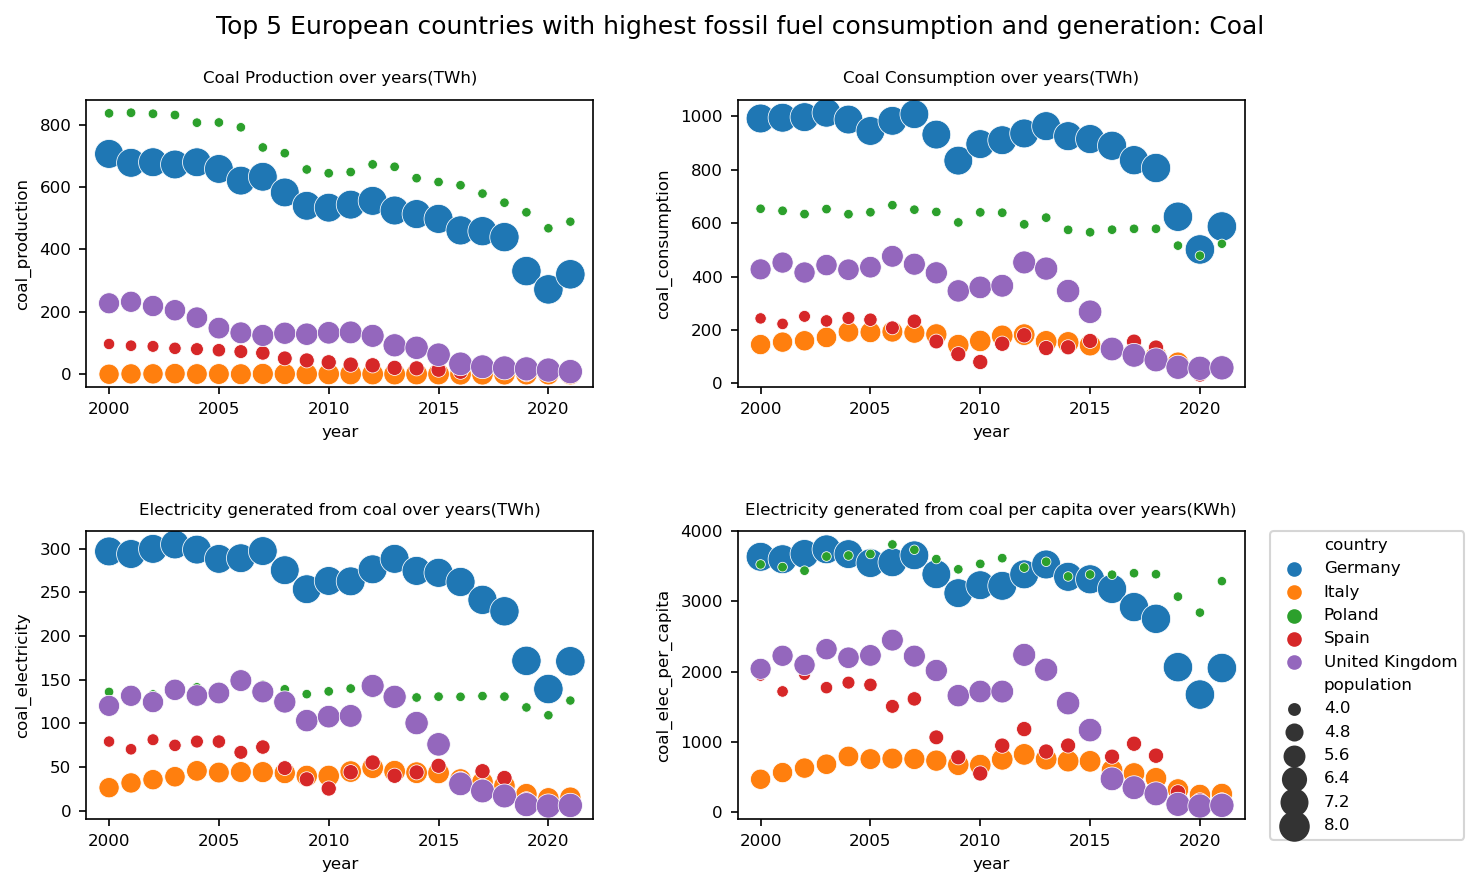

In [20]:
# COAL
# Top 5 European countries with highest fossil fuel consumption and generation

with plt.rc_context(rc = {'figure.dpi': 150, 'axes.labelsize': 8,
                          'xtick.labelsize': 8, 'ytick.labelsize': 8,'legend.fontsize': 8,
                          'legend.title_fontsize': 8, 'axes.titlesize': 8, 
                          'axes.titlepad': 8}):
    fig_4, ax_4 = plt.subplots(2, 2, figsize = (10,6), gridspec_kw = {'width_ratios': [4, 4], 'height_ratios': [3, 3]})
    ax_flat = ax_4.flatten()
   
    ## 1st graph
    sns.scatterplot(ax=ax_flat[0],data=gg_top_c, x="year", y="coal_production", hue="country",  size="population", sizes=(20, 200),legend =None, linestyle='-', marker='o').set_title('Coal Production over years(TWh)')
    
    ## 2nd graph
    sns.scatterplot(ax=ax_flat[1],data=gg_top_c, x="year", y="coal_consumption", hue="country",  size="population", sizes=(20, 200),legend =None).set_title('Coal Consumption over years(TWh)')
       
    ## 3rd graph
    sns.scatterplot(ax=ax_flat[2],data=gg_top_c, x="year", y="coal_electricity", hue="country",  size="population", sizes=(20, 200),legend =None).set_title('Electricity generated from coal over years(TWh)')
    
    ## 4th graph
    sns.scatterplot(ax=ax_flat[3],data=gg_top_c, x="year", y="coal_elec_per_capita", hue="country",  size="population", sizes=(20, 200)).set_title('Electricity generated from coal per capita over years(KWh)')
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=8)
    fig_4.suptitle("Top 5 European countries with highest fossil fuel consumption and generation: Coal")
    plt.tight_layout(pad=1.2, w_pad=3, h_pad=3)
    plt.show()

Amongst the 5 countries, Poland with the smallest population has the highest coal production; fortunately, the production of coal has seen a major decrease. Poland is the second highest coal consumer after Germany. It is also the topmost electricity generator from coal per capita (KWh) as of 2021. Even with a low electricity demand, Poland has managed to generate high amount of electricity from coal.

Germany undoubtedly has topped the charts given it has the highest population.

UK has massively reduced its coal consumption and electricity generation over the years. 
Coal production is dropping over the years that means these countries are either relying on imports or switching to renewable sources.

### 4.2.3 Role of Oil

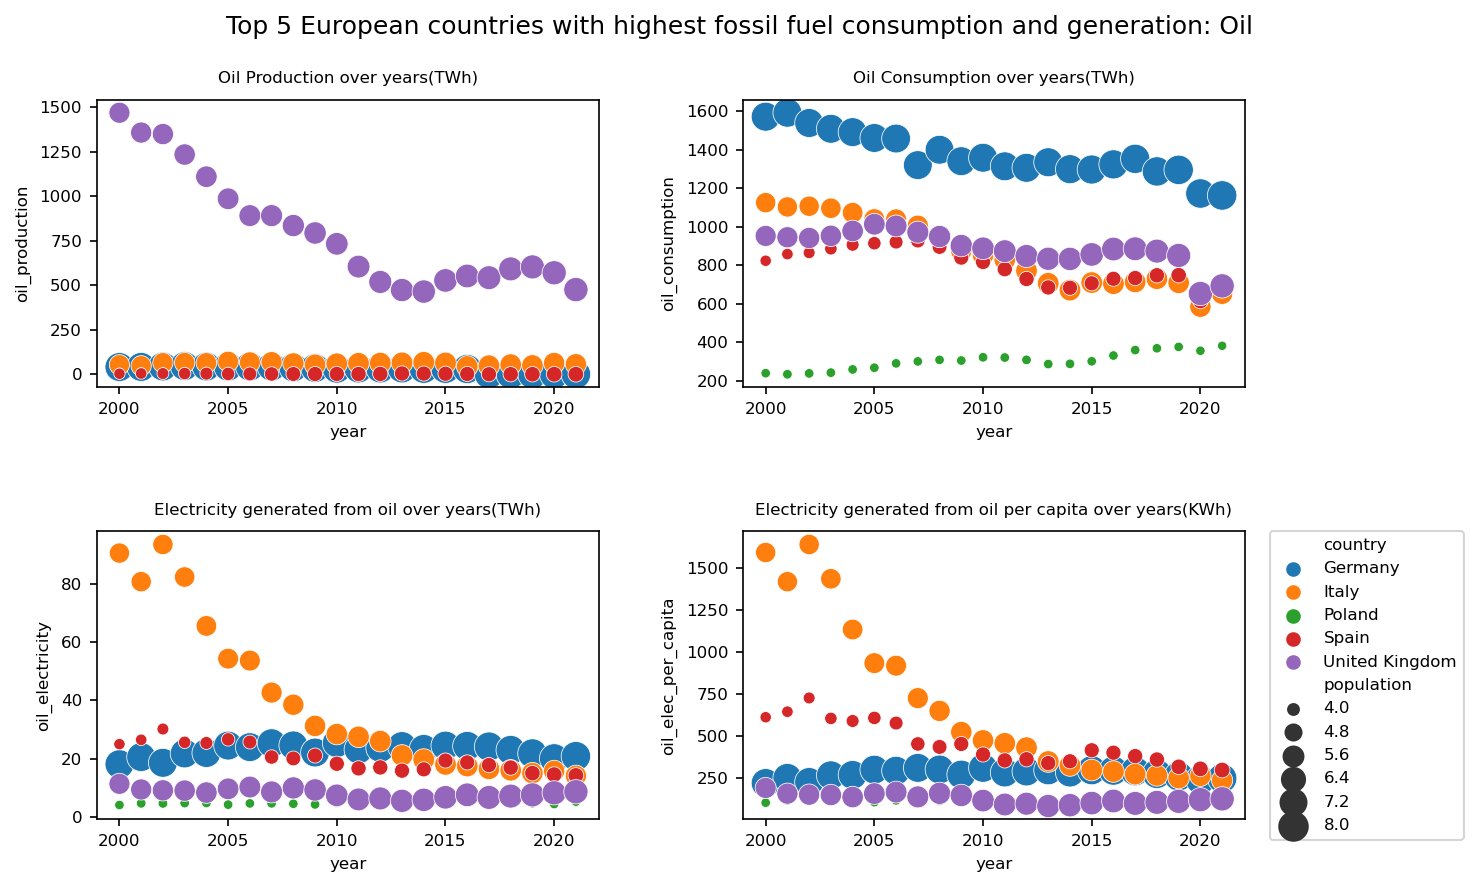

In [21]:
# OIL
# Top 5 European countries with highest fossil fuel consumption and generation
with plt.rc_context(rc = {'figure.dpi': 150, 'axes.labelsize': 8,
                          'xtick.labelsize': 8, 'ytick.labelsize': 8,'legend.fontsize': 8,
                          'legend.title_fontsize': 8, 'axes.titlesize': 8, 
                          'axes.titlepad': 8}):
    fig_4, ax_4 = plt.subplots(2, 2, figsize = (10,6), gridspec_kw = {'width_ratios': [4, 4], 'height_ratios': [3, 3]})
    ax_flat = ax_4.flatten()
   
    ## 1st graph
    sns.scatterplot(ax=ax_flat[0],data=gg_top_c, x="year", y="oil_production", hue="country",  size="population", sizes=(20, 200),legend =None).set_title('Oil Production over years(TWh)')
            
    ## 2nd graph
    sns.scatterplot(ax=ax_flat[1],data=gg_top_c, x="year", y="oil_consumption", hue="country",  size="population", sizes=(20, 200),legend =None).set_title('Oil Consumption over years(TWh)')
          
    ## 3rd graph
    sns.scatterplot(ax=ax_flat[2],data=gg_top_c, x="year", y="oil_electricity", hue="country",  size="population", sizes=(20, 200),legend =None).set_title('Electricity generated from oil over years(TWh)')
     
    ## 4th graph
    sns.scatterplot(ax=ax_flat[3],data=gg_top_c, x="year", y="oil_elec_per_capita", hue="country",  size="population", sizes=(20, 200)).set_title('Electricity generated from oil per capita over years(KWh)')
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=8)
    fig_4.suptitle("Top 5 European countries with highest fossil fuel consumption and generation: Oil")
    plt.tight_layout(pad=1.2, w_pad=3, h_pad=3)
    plt.show()

UK was the topmost oil producer but it has managed to bring the production way down from 2005 and has managed to reduce it to 400 TWh. All other countries have little to no oil production over the years.
However, Oil consumption still remains in the range 600-1300 TWh even with such low oil production.

In lineplot(3), Italy had the edge as it highly generated electricity from oil since 2000 but it has also managed to lower the generation. All other countries have electricity generated from oil below 35 TWh. 

### 4.2.4 Role of Gas

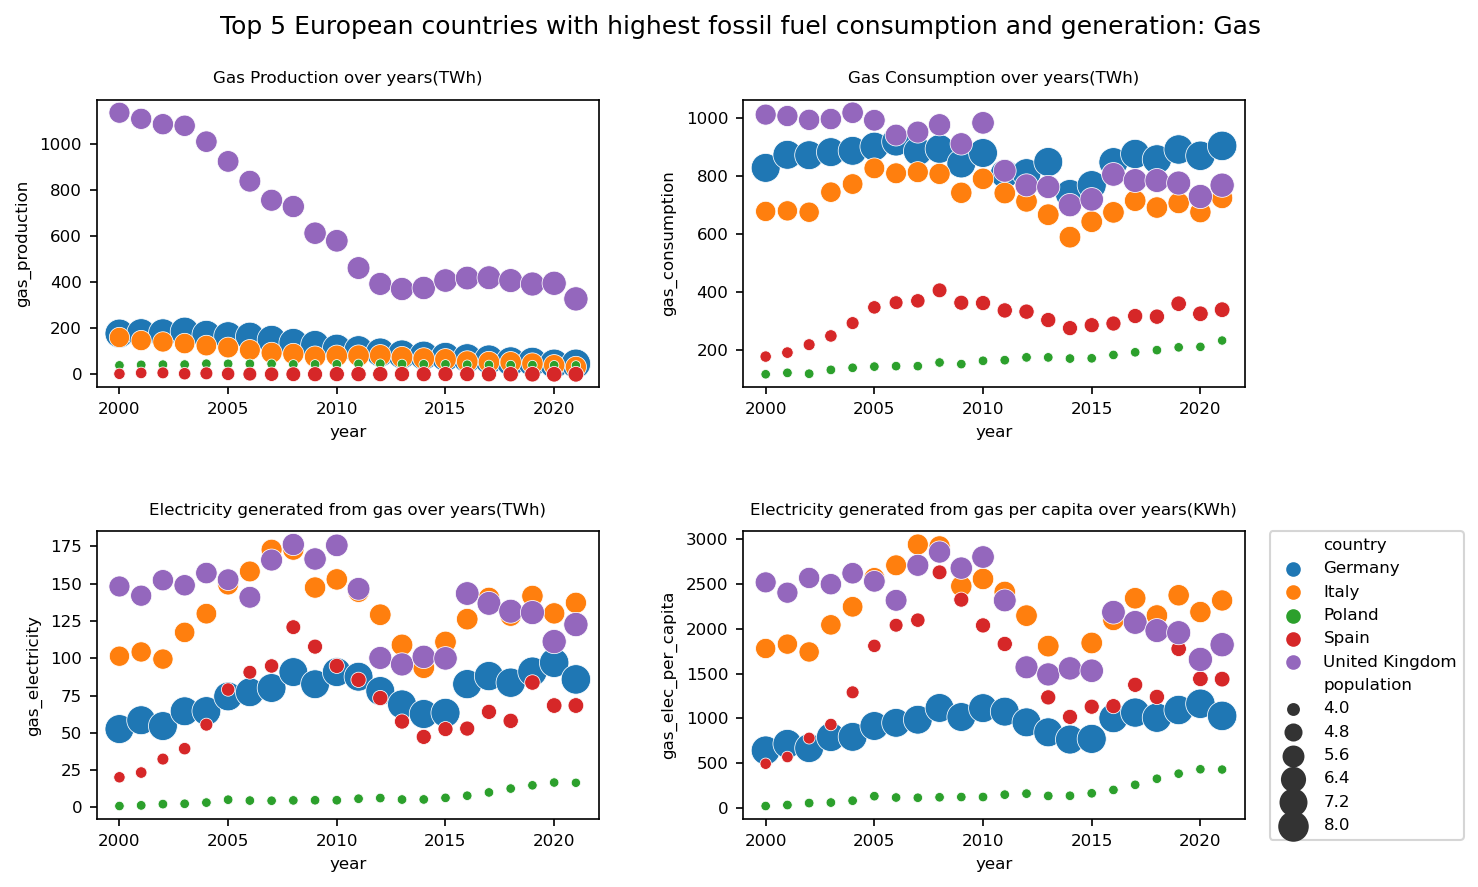

In [22]:
# GAS
# Top 5 European countries with highest fossil fuel consumption and generation

with plt.rc_context(rc = {'figure.dpi': 150, 'axes.labelsize': 8,
                          'xtick.labelsize': 8, 'ytick.labelsize': 8,'legend.fontsize': 8,
                          'legend.title_fontsize': 8, 'axes.titlesize': 8, 
                          'axes.titlepad': 8}):
    fig_4, ax_4 = plt.subplots(2, 2, figsize = (10,6), gridspec_kw = {'width_ratios': [4, 4], 'height_ratios': [3, 3]})
    ax_flat = ax_4.flatten()
   
    ## 1st graph
    sns.scatterplot(ax=ax_flat[0],data=gg_top_c, x="year", y="gas_production", hue="country",  size="population", sizes=(20, 200),legend =None).set_title('Gas Production over years(TWh)')
            
    ## 2nd graph
    sns.scatterplot(ax=ax_flat[1],data=gg_top_c, x="year", y="gas_consumption", hue="country",  size="population", sizes=(20, 200),legend =None).set_title('Gas Consumption over years(TWh)')
          
    ## 3rd graph
    sns.scatterplot(ax=ax_flat[2],data=gg_top_c, x="year", y="gas_electricity", hue="country",  size="population", sizes=(20, 200),legend =None).set_title('Electricity generated from gas over years(TWh)')
     
    ## 4th graph
    sns.scatterplot(ax=ax_flat[3],data=gg_top_c, x="year", y="gas_elec_per_capita", hue="country",  size="population", sizes=(20, 200)).set_title('Electricity generated from gas per capita over years(KWh)')
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=8)
    fig_4.suptitle("Top 5 European countries with highest fossil fuel consumption and generation: Gas")
    plt.tight_layout(pad=1.2, w_pad=3, h_pad=3)
    plt.show()

UK was the topmost gas producer but it has managed to bring the production way down from 2003 and has managed to reduce it to 400 TWh and below. All other countries have had gas production upto 200TWh; however, they dropped their production to below 50TWh by 2021.

However, Gas consumption has managed to rapidly increase with Germany and UK being the top 2 consumers amongst the five countries as of 2021. 

In lineplot(3), Italy & Spain even with such low populations have been growing to generate electricity from gas. It is evident that gas consumptions remain in a higher range compared to the electricity generated. It can be noticed that with such low supply and yet a high consumption, these countries either rely on imports or have switched to renewables. 

## 4.3 - Interesting insights so far

- Greenhouse gas emissions reduce at a low rate but there is a significant change; however, when checked if fossil fuels are the biggest reason for these countries to fall under top emitters of Greenhouse gas seems to have been proved otherwise.
- These emissions don't seem to be all from electricity generated using fossil fuels - to understand how fossil fuels are produced and utilised was analysed further.
- Visualised these top 5 countries with highest fossil fuel consumption to understand consumption and generation of coal, gas and oil individually.
- Interesting insight - the gas production in these countries is so low and, in the UK, they have stepped down to extreme low levels. But all of the above graphs prove that consumption is only increasing but production remains decreasing - these countries are highly dependent on imports from outside.
- These were proved using top contributors and users of fossil fuel in Europe. Next, deeper dive on continent level to understand overall EU energy usage. Checking Russia's production and consumption to understand if they produce more than they consume and how EU was dependent on Russia for imports.

# 5. Analysis - Europe & Russian Energy production/ consumption

## 5.1 Primary energy consumption - Europe

Primary energy consumption measures the total energy demand of a country. Primary energy is calculated based on the 'substitution method' which takes account of the inefficiencies in fossil fuel production by converting non-fossil energy into the energy inputs required if they had the same conversion losses as fossil fuels.

NameError: name 'rcParams' is not defined

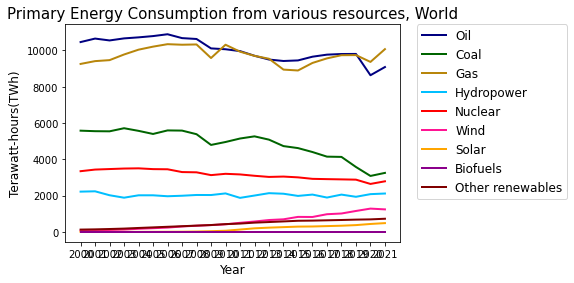

In [23]:
# Europe's Primary energy consumption over 20 years span

#Oil Primary energy consumption
sns.lineplot(x = eur_energy['year'],y = eur_energy['oil_consumption'], lw=2,
             label= 'Oil', color='navy',data=eur_energy, ci=None)

#Coal Primary energy consumption
sns.lineplot(x=eur_energy['year'],y=eur_energy['coal_consumption'], lw=2,
             label= 'Coal',color='darkgreen',data=eur_energy,ci=None)

#Gas Primary energy consumption
sns.lineplot(x=eur_energy['year'],y=eur_energy['gas_consumption'], lw=2,
             label= 'Gas',color='darkgoldenrod',data=eur_energy,ci=None)

#Hydropower Primary energy consumption
sns.lineplot(x=eur_energy['year'],y=eur_energy['hydro_consumption'], lw=2,
             label= 'Hydropower',color='deepskyblue',data=eur_energy,ci=None)

#Nuclear Primary energy consumption
sns.lineplot(x=eur_energy['year'],y=eur_energy['nuclear_consumption'], lw=2,
             label= 'Nuclear',color='red',data=eur_energy,ci=None)

#Wind Primary energy consumption
sns.lineplot(x=eur_energy['year'],y=eur_energy['wind_consumption'], lw=2,
             label= 'Wind',color='deeppink',data=eur_energy,ci=None)

#Solar Primary energy consumption
sns.lineplot(x=eur_energy['year'],y=eur_energy['solar_consumption'], lw=2,
             label= 'Solar',color='orange',data=eur_energy,ci=None)

#Biofuels Primary energy consumption
sns.lineplot(x=eur_energy['year'],y=eur_energy['biofuel_consumption'], lw=2,
             label= 'Biofuels',color='darkmagenta',data=eur_energy,ci=None)

#Other renewables Primary energy consumption
sns.lineplot(x=eur_energy['year'],y=eur_energy['other_renewable_consumption'], lw=2,
             label= 'Other renewables',color='maroon',data=eur_energy,ci=None)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=12)
plt.title("Primary Energy Consumption from various resources, World", fontsize = 15)
plt.xlabel("Year",fontsize = 12)
plt.ylabel("Terawatt-hours(TWh)", fontsize = 12)
plt.xticks(eur_energy['year'])
rcParams['figure.figsize'] = 12, 10
plt.tick_params(labelsize=10)
plt.show()

The lineplot describes primary energy demand by various energy sources over the span of 20 years.

For EU:
Gas, Oil, coal, and nuclear energy - primary energy consumption from these fuels remain high as of 2021. However, their demand had dropped a little during 2019-2020, covid being the plausible reason. Primary energy consumption from hydropower is largest amongst all other renewable energy resources. This is followed by wind and other renewables.

There is a no primary energy consumption from biofuels, a core reason could be the drawbacks associated to certain types of biofuels. For example: Biodiesel, which is usually made from soybeans, could replace conventional diesel in areas like aviation or long-haul trucking, but, for now, producing it at scale is cost-prohibitive. The feedstock inputs required for biodiesel are more expensive than petroleum.

## 5.2 Analysing top 3 primary energy consumed - Europe 

In [ ]:
# European fossil fuels(coal, oil, gas) consumption and production

with plt.rc_context(rc = {'figure.dpi': 250, 'axes.labelsize': 8,
                          'xtick.labelsize': 8, 'ytick.labelsize': 8,'legend.fontsize': 8,
                          'legend.title_fontsize': 8, 'axes.titlesize': 8, 
                          'axes.titlepad': 8}):
    fig_6, ax_6 = plt.subplots(3, 2, figsize = (10,7))
    ax_flat = ax_6.flatten()
   
    ## 1st graph
    sns.lineplot(ax=ax_flat[0],data=eur_energy, x="year", y="coal_production",color='#3D59AB').set_title('Coal Production over years(TWh)')
            
    ## 2nd graph
    sns.lineplot(ax=ax_flat[1],data=eur_energy, x="year", y="coal_consumption",color='#3D59AB').set_title('Coal Consumption over years(TWh)')
          
    ## 3rd graph
    sns.lineplot(ax=ax_flat[2],data=eur_energy, x="year", y="oil_production", color='#E3CF57').set_title('Oil Production over years(TWh)')
     
    ## 4th graph
    sns.lineplot(ax=ax_flat[3],data=eur_energy, x="year", y="oil_consumption",color='#E3CF57').set_title('Oil consumption over years(TWh)')
    
    ## 5th graph
    sns.lineplot(ax=ax_flat[4],data=eur_energy, x="year", y="gas_production",color='#EE9572').set_title('Gas Production over years(TWh)')
     
    ## 6th graph
    sns.lineplot(ax=ax_flat[5],data=eur_energy, x="year", y="gas_consumption",color='#EE9572').set_title('Gas consumption over years(TWh)')
    
    fig_6.suptitle("Fossil fuels(coal, oil, gas) consumption and production (TWh), Europe")
    plt.tight_layout(pad=1.2, w_pad=3, h_pad=3)
    plt.show()

EU's top fuel production and consumption:
1. Coal - Coal production started in the 2000s at 4500 terawatt-hours (Twh) but with various fluctuations over the years its been brought down to 4000 terawatt-hours (TWh) during 2021. Peculiarly, coal consumption is only dropping since 2000s and has reduced from 5500 terawatt-hours to almost 3500 terawatt-hours.
2. Oil - Oil production in EU started at 7750 terawatt-hours and increased up to 8750 terawatt-hours in 2005. With shifts in production, oil production in EU stands at about 8200 terawatt-hours. 
Oil consumption started at 10500 terawatt-hours and has dropped to 9500 terawatt-hours in 2021.
3. Gas - Gas production and consumption in Europe has seen massive fluctuation over the past 20 years - gas production started at 8500 terawatt-hours and increased up to 9500 terawatt-hours around 2008 and dropped and grew even larger and as of 2021 it is at 9100 terawatt-hours. 
Gas consumption started a bit lower at around 9200 TWh and as of 2021 it has reached 10000 terawatt-hours 


Primary energy consumption from fossil fuel seems to be higher than production: Natural-gas shortages have led to a revival of coal in Europe, which is damaging to net-zero goals


## 5.3 Russia's energy production/ consumption

In [ ]:
## Creating our data
## Russia data - 2000:2021

rus_energy = energy[(energy['country']=='Russia')
                        &(energy['year']>=2000)]
rus_energy.tail(2)

In [ ]:
# European fossil fuels(coal, oil, gas) consumption and production

with plt.rc_context(rc = {'figure.dpi': 250, 'axes.labelsize': 8,
                          'xtick.labelsize': 8, 'ytick.labelsize': 8,'legend.fontsize': 8,
                          'legend.title_fontsize': 8, 'axes.titlesize': 8, 
                          'axes.titlepad': 8}):
    fig_6, ax_6 = plt.subplots(3, 2, figsize = (10,7))
    ax_flat = ax_6.flatten()
   
    ## 1st graph
    sns.lineplot(ax=ax_flat[0],data=rus_energy, x="year", y="coal_production",color='#3D59AB').set_title('Coal Production over years(TWh)')
            
    ## 2nd graph
    sns.lineplot(ax=ax_flat[1],data=rus_energy, x="year", y="coal_consumption",color='#3D59AB').set_title('Coal Consumption over years(TWh)')
          
    ## 3rd graph
    sns.lineplot(ax=ax_flat[2],data=rus_energy, x="year", y="oil_production", color='#E3CF57').set_title('Oil Production over years(TWh)')
     
    ## 4th graph
    sns.lineplot(ax=ax_flat[3],data=rus_energy, x="year", y="oil_consumption",color='#E3CF57').set_title('Oil consumption over years(TWh)')
    
    ## 5th graph
    sns.lineplot(ax=ax_flat[4],data=rus_energy, x="year", y="gas_production",color='#EE9572').set_title('Gas Production over years(TWh)')
     
    ## 6th graph
    sns.lineplot(ax=ax_flat[5],data=rus_energy, x="year", y="gas_consumption",color='#EE9572').set_title('Gas consumption over years(TWh)')
    
    fig_6.suptitle("Fossil fuels(coal, oil, gas) consumption and production (TWh), Russia")
    plt.tight_layout(pad=1.2, w_pad=3, h_pad=3)
    plt.show()

Coal - Russia's coal production stand at 2500 terrawatt-hours and coal consumption minimised to below 1000 TWh. 
Oil Production over 21 years has only risen and as of 2021 is at 6000 TWh and oil consumption is only around 1800 TWh. 

Russia produces more than it consumes.

Russia consumes about 4800 TWh of gas and produces almost double - 7000 TWh.
Clearly Russia produces these fuels more than it consumes them - Russia imports these to other countries and lack of these energy resources has caused crisis in Europe. 

## 5.4 Comparison - Europe & Russia

In [ ]:
# European fossil fuels(coal, oil, gas) consumption and production

with plt.rc_context(rc = {'figure.dpi': 250, 'axes.labelsize': 8, 
                          'xtick.labelsize': 8, 'ytick.labelsize': 8,'legend.fontsize': 8,
                          'legend.title_fontsize': 8, 'axes.titlesize': 8, 
                          'axes.titlepad': 8}):
    fig_6, ax_6 = plt.subplots(3, 2, figsize = (10,7))
    ax_flat = ax_6.flatten()
   
    ## 1st graph
    sns.lineplot(ax=ax_flat[0],data=rus_energy, x="year", y="coal_production",color='#3D59AB').set_title('Russia-Coal Production over years(TWh)')
            
    ## 2nd graph
    sns.lineplot(ax=ax_flat[1],data=eur_energy, x="year", y="coal_consumption",color='#3D59AB').set_title('Europe-Coal Consumption over years(TWh)')
          
    ## 3rd graph
    sns.lineplot(ax=ax_flat[2],data=rus_energy, x="year", y="oil_production", color='#E3CF57').set_title('Russia-Oil Production over years(TWh)')
     
    ## 4th graph
    sns.lineplot(ax=ax_flat[3],data=eur_energy, x="year", y="oil_consumption",color='#E3CF57').set_title('Europe-Oil consumption over years(TWh)')
    
    ## 5th graph
    sns.lineplot(ax=ax_flat[4],data=rus_energy, x="year", y="gas_production",color='#EE9572').set_title('Russia-Gas Production over years(TWh)')
     
    ## 6th graph
    sns.lineplot(ax=ax_flat[5],data=eur_energy, x="year", y="gas_consumption",color='#EE9572').set_title('Europe-Gas consumption over years(TWh)')
    
    fig_6.suptitle("Comparing Russia's production & Europe's consumption (TWh)")
    plt.tight_layout(pad=1.2, w_pad=3, h_pad=3)
    plt.show()

**Comparing Russian fuel production vs EU's consumption**

In terms of coal, Russia produces 2500 TWh and EU consumes 3000 TWh while producing 3500 TWh coal itself.
It was also moving towards cleaner energy by reducing coal consumption.

Russia's oil consumption is below 1800 TWh but it produces about 6000 TWh - Europe's oil consumption is the highest at 9500 TWh explains that EU doesn't produce much and is dependent on other country imports.

Note: The subplots above is just to help the viewer to not keep scrolling and helps me justify my point.


Moving on we can look at the sentiments of people towards the 2022 Energy crisis..

# 6 Sentiment Analysis - Twitter(Europe energy crisis)

The war in Ukraine has driven up gas prices and the cost of producing electricity in gas-fired plants across Europe, while heat waves have crippled hydroelectric and nuclear energy generation. Due to the marginal cost pricing model, the price of wholesale electricity is set by the most expensive operating plant.

Sentiments of people around the world would help us understand how its affected them and what impact its left on them. 

Sentiment analysis refers to identifying as well as classifying the sentiments that are expressed in the text source. Tweets are often useful in generating a vast amount of sentiment data upon analysis. These data are useful in understanding the opinion of the people about a variety of topics.

Specifically, I chose twitter data as the hastag #EuropeEnergycrisis was trending and I believed I would get useful insights from the same.

## 6.1 Web scraping - Data collection

In [ ]:
#importing libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import snscrape.modules.twitter as sntwitter 
from pandas import Series
from pylab import*

#importing text processing libraries
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer 
from nltk.stem.porter import PorterStemmer

import string 
import re 
import textblob 
from textblob import TextBlob 

from wordcloud  import WordCloud, STOPWORDS 
from emot.emo_unicode import UNICODE_EMOJI 

lemmatizer = WordNetLemmatizer()

#Wordcloud library
from wordcloud import ImageColorGenerator 
from PIL import Image

#ignoring warnings
import warnings
%matplotlib inline

One of the main reasons for the plunge in prices is that Europe, is because over the summer, Europe went on a global buying spree as Russia, its longtime main supplier, reduced its flow of natural gas. 

Let's look at people's views from June 2022 - December 2022 - have people been relaxed, calm and positive or have they been fairly affected and are angry..


**Web scraping and gathering data into a a csv file**

**Note: the following code is in comments as after web scraping - data is collected within a csv file**

In [ ]:
#Web scraping and gathering the data into a data frame
#Using specific hastags and words to search for from Feb 2022 - Dec 2022 

#query = "(Europe energy crisis OR #Europeenergy OR #Europeenergycrisis) since:2022-06-01 until:2022-12-31"
#tweets = []
#for i, tweet in enumerate(sntwitter.TwitterSearchScraper(query).get_items()):
#    if i>20000:
#        break
#    else:
#       tweets.append([tweet.date, tweet.id, tweet.url, tweet.user.username, tweet.sourceLabel, tweet.user.location, tweet.content, tweet.likeCount, tweet.retweetCount])
#e_twit = pd.DataFrame(tweets, columns = ['Date', 'ID', 'url','username', 'source', 'location', 'tweet', 'num_of_likes','num of retweet'])
#e_twit.to_csv('sentiment.csv', mode = 'a')

In [ ]:
# Reading the file
e_twit = pd.read_csv('sentiment.csv', encoding='unicode_escape')
e_twit.head(2)

The dataset provided is the 'sentiment' Dataset which consists of 80,011 tweets that have been scraped from Twitter. The various columns present in the dataset are:

**Data specifications**
- Date: the date of the tweet
- ID: Unique id of the tweet
- url: tweet url
- username: It refers to the name of the user that tweeted
- source: Location of the tweet
- tweet: It refers to the text of the tweet
- num_of_likes: number of likes on the tweet
- num of retweet: number of retweets 

## 6.2 Data & Text Pre-processing

The missing locations were filled with the word ‘Unknown’. 

In [ ]:
#Filling the missing locations
e_twit.location.isna().sum()

In [ ]:
e_twit['location'] = e_twit['location'].fillna('Unknown')

**Text Pre-processing using nltk**

- Converting the words to lower case: During the preprocessing stage, the tweet column is converted to lower case words to make the words uniform.
- Removing Url links, digits, punctuation, emojis and every other thing that may not be necessary for the sentiment analysis
- Tokenizing the tweets column that is breaking the sentence down into bits of words
- Removing stop words: This are word that don’t give meaning to the context of a sentence example is, the etc.
- Lemmatizing words: This is to get the base of words ie bags the lemmatized form is bag

In [ ]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer 
from nltk.stem.porter import PorterStemmer

In [ ]:
eng_stop_words = set(stopwords.words('english'))

In [ ]:
emoji = set(UNICODE_EMOJI.keys())

In [ ]:
# function for preprocessing tweet in preparation for sentiment analysis
def CleanedTweets(text):
    
    #changing tweet text to small letters
    text = text.lower()
    
    # Removing @ and links
    text = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+)", " ", text).split())
    
    # removing repeating characters
    text = re.sub(r'\@\w+|\#\w+|\d+', '', text)
    
    # removing punctuation and numbers
    punct = str.maketrans('','', string.punctuation+string.digits)
    text = text.translate (punct)
    
    # tokenizing words and removing stop words from the tweet text
    tokens = word_tokenize(text)
    filtered_words = [w for w in tokens if w not in eng_stop_words]
    filtered_words = [w for w in filtered_words if w not in emoji]
    
    # Lemmetizing words
    lemmatizer = WordNetLemmatizer()
    lemma_words = [lemmatizer.lemmatize(w) for w in filtered_words]
    text = " ".join(lemma_words)
    return text

In [ ]:
#changing tweets into string datatype
e_twit['tweets'] =e_twit['tweet'].astype(str)

**Applying the function to the tweets data - creating a new 'cleaned tweets' column**

In [ ]:
# Generate a new column called 'Cleaned Tweets' by applying preprocessed tweets function to the 'Tweet' column.
e_twit['Cleaned_Tweets'] = e_twit['tweets'].apply(CleanedTweets)

## 6.3 Data Wrangling 

**Searching for certain usage of words**

We all are aware of how there are certain words that comes to mind that are related to europe energy crisis - Using data wrangling technique, I'd like to understand what their sentiments were when they used certain words in their tweets.
For example, when using 'renewables' was their sentiment positive/ negative or neutral.

For us to know the number of times these reasons were listed out for the energy crisis/ were mentioned in a tweet - these words need to be extracted into separate columns by writing a function. 

In [ ]:
# extracting certain words
def extract_russia(n):
    n = str(n)
    resp = n.lower().find("russia")
    if resp != -1:
        return "Russia"
    else:
        return None
    
def extract_ukrainewar(n):
    n = str(n)
    resp = n.lower().find("ukraine war")
    if resp != -1:
        return "Ukraine war" 
    else:
        return None
    
def extract_esupply(n):
    n = str(n)
    resp = n.lower().find("energy supply")
    if resp != -1:
        return "Energy supply" 
    else:
        return None
    
def extract_ecost(n):
    n = str(n)
    resp = n.lower().find("energy cost")
    if resp != -1:
        return "Energy cost" 
    else:
        return None

def extract_inflation(n):
    n = str(n)
    resp = n.lower().find("inflation")
    if resp != -1:
        return "Inflation" 
    else:
        return None
    
def extract_natgas(n):
    n = str(n)
    resp = n.lower().find("natural gas")
    if resp != -1:
        return "Natural gas" 
    else:
        return None

def extract_gasprice(n):
    n = str(n)
    resp = n.lower().find("gas prices")
    if resp != -1:
        return "Gas price" 
    else:
        return None

def extract_fossilfuel(n):
    n = str(n)
    resp = n.lower().find("fossil fuel")
    if resp != -1:
        return "Fossil fuel" 
    else:
        return None

def extract_renenergy(n):
    n = str(n)
    resp = n.lower().find("renewable energy")
    if resp != -1:
        return "Renewable energy" 
    else:
        return None

In [ ]:
# assigning functions to columns
e_twit['Russia'] = e_twit['tweets'].apply(extract_russia)
e_twit['UkraineWar'] = e_twit['tweets'].apply(extract_ukrainewar)
e_twit['Energysupply'] = e_twit['tweets'].apply(extract_esupply)
e_twit['Energycost'] = e_twit['tweets'].apply(extract_ecost)
e_twit['Inflation'] = e_twit['tweets'].apply(extract_inflation)
e_twit['Gasprices'] = e_twit['tweets'].apply(extract_gasprice)
e_twit['Fossilfuels'] = e_twit['tweets'].apply(extract_fossilfuel)
e_twit['Renewableenergy'] = e_twit['tweets'].apply(extract_renenergy)

In [ ]:
e_twit.head(1)

In [ ]:
# convert the tweet text into a string separate with " "
tweets_string = e_twit['Cleaned_Tweets'].tolist()
tweets_string = " ".join(tweets_string)

## 6.4 Sentiment Analysis

Polarity of text/ tweets : Positive, Negative, or Neutral

After data wrangling and pre-processing, TextBlob library is used to get the level of the text polarity; that is, the value of how good, bad or neutral the text is which is between the range of 1 to -1. 

A condition is set to get the sentiment which is set at < 0 is positive, == 0 is neutral and > 1 is negative.

In [ ]:
# Function for polarity score
def polarity(tweet):
    return TextBlob(tweet).sentiment.polarity

# Function to get sentiment type
#setting the conditions to return sentiments 
def sentimenttextblob(polarity):
    if polarity < 0:
        return "Negative"
    elif polarity == 0:
        return "Neutral"
    else:
        return "Positive"  

In [ ]:
# using the functions to get the polarity and sentiment
e_twit['Polarity'] = e_twit['Cleaned_Tweets'].apply(polarity)
e_twit['Sentiment'] = e_twit['Polarity'].apply(sentimenttextblob)
sent = e_twit['Sentiment'].value_counts()
sent

In [ ]:
# plotting bar chart for the Sentiment
plt.subplot(1,2,1)
sent.plot(kind='bar', color=['lightgreen','grey','red'], figsize=(15,5))
plt.title('Sentiment percieved on Europe Energy crisis, Twitter', fontsize=16)
plt.xlabel('Type of sentiment')
plt.ylabel('Number of sentiment');

Tweets from past 6 months seem to be more positive, this sense of things being “relaxed” - the opposite emotion of what I perceived as panic gripped all over since the news of Russia-Ukraine War earlier in February 2022.


These sentiments past 6 months could also be positive because EU countries adopted an emergency regulation to address high energy prices and help citizens and businesses that are most affected by the energy crisis. 

## 6.5 EDA

### 6.5.1 Analysis

Exploring the dataset collected:

In [ ]:
# Converting Date to time variable
# using errors='coerce' for it to convert only non parseable values to NaT
e_twit['created_at'] = pd.to_datetime(e_twit['Date'], errors='coerce')

In [ ]:
# Set the index to created_at variable - this allows to manipulate the data by time
e_twit = e_twit.set_index(['created_at'])

In [ ]:
def f(x):
     return Series(dict(Number_of_tweets = x['Cleaned_Tweets'].count(),))

In [ ]:
# Generating 'Daily Counts' as the count of tweets as per date
daily_count = e_twit.groupby(e_twit.index.date).apply(f)
print(len(daily_count))
daily_count.head(5)

In [ ]:
# Naming the index and inspecting the first five rows in the dataframe
daily_count.index.name = 'date'
daily_count.head(5)

In [ ]:
#inspect data - min date value
daily_count.index.min()

In [ ]:
#inspect data - max date value
daily_count.index.max()

### 6.5.2 Analysis - Plots

In [ ]:
# Plotting number of tweets - over time

plt.figure(figsize=(10,6))
daily_plot = daily_count['Number_of_tweets'].plot(kind='line', lw=2, color ='navy', alpha=1, legend=True, x_compat=True)

daily_plot.set_xlabel('Months (2022)', weight='bold', labelpad=15)    
daily_plot.set_ylabel('No of Tweets', weight='bold', labelpad=15) 

xticks(fontsize = 9, rotation = -30, ha ="left")  
yticks(fontsize = 9)                              

daily_plot.legend_ = None
daily_plot.tick_params(axis='x', pad=5) 
plt.title('Number of Tweets over the months, Twitter', fontsize=16)
#savefig('daily counts.png', bbox_inches='tight', dpi=300, format='png') 

Tweets seemed to have decreased over the span of last few months to less than 500 by December 2022.

In [ ]:
# Displaying the most talked about word in a word cloud 
# Instantiate the Twitter word cloud object
w_cloud = WordCloud(collocations = False, max_words=200, background_color = 'white', colormap='plasma', width = 10000, height = 5000).generate(tweets_string)

plt.imshow(w_cloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most used words, Tweets', fontsize=16)
rcParams['figure.figsize'] = 11.7,8.27
plt.show()

**Mentions of certain words - reasons stated on the internet**

Understanding the sentiment behind these certain words related to the Europe energy crisis**


In [ ]:
# Mentions of certain words and sentiment towards it
with plt.rc_context(rc = {'figure.dpi': 300, 'axes.labelsize': 9,
                          'xtick.labelsize': 9, 'ytick.labelsize': 9, 
                          'legend.title_fontsize': 5, 'axes.titlesize': 9, 'legend.fontsize':5,
                          'axes.titlepad': 7}):

    fig_8, ax_8 = plt.subplots(2, 4, figsize = (10,6))
    ax_flat = ax_8.flatten()
    
    ## 1st graph
    sns.countplot(ax=ax_flat[0], x=e_twit['Russia'], hue=e_twit['Sentiment'],
                  palette=["grey","red","lightgreen"]).set_title('Russia')

    ## 2nd graph
    sns.countplot(ax=ax_flat[1], x=e_twit['UkraineWar'], hue=e_twit['Sentiment'],
                 palette=["grey","red","lightgreen"]).set_title('Ukraine War')
    
    ## 3rd graph
    sns.countplot(ax=ax_flat[2], x=e_twit['Energysupply'], hue=e_twit['Sentiment'],
                  palette=["grey","red","lightgreen"]).set_title('Energy supply')
    
    ## 4th graph
    sns.countplot(ax=ax_flat[3], x=e_twit['Energycost'], hue=e_twit['Sentiment'],
                  palette=["grey","red","lightgreen"]).set_title('Energy price')
    
    ## 5th graph
    sns.countplot(ax=ax_flat[4], x=e_twit['Inflation'], hue=e_twit['Sentiment'],
                  palette=["grey","red","lightgreen"]).set_title('inflation')

    ## 6th graph
    sns.countplot(ax=ax_flat[5], x=e_twit['Gasprices'], hue=e_twit['Sentiment'],
                 palette=["grey","red","lightgreen"]).set_title('Gas prices')
    
    ## 7th graph
    sns.countplot(ax=ax_flat[6], x=e_twit['Fossilfuels'], hue=e_twit['Sentiment'],
                  palette=["grey","red","lightgreen"]).set_title('Fossil Fuels')
    
    ## 8th graph
    sns.countplot(ax=ax_flat[7], x=e_twit['Renewableenergy'], hue=e_twit['Sentiment'],
                  palette=["grey","red","lightgreen"]).set_title('Renewable Energy')
         
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=8)  
    fig_8.suptitle('Words mentioned vs sentiment towards: Tweets')
    plt.tight_layout(pad=1.2, w_pad=3, h_pad=3)
    plt.show()

Amongst the eight words i tried to understand the sentiment for:
The results seem a bit biased considering that it doesn't sample every tweet avaialable and can't possibly represent how every person feels about it-

Comparing the negative sentiments amongst these eight words based on word counts 
Russia has the most negative count(3800), followed by Inflation (1500) and Gas prices & energy prices (300).

However, renewable energy seems to have a positive sentiment even with the crisis - look like due to this energy crisis needs to speed renewables to the market and take other steps to avoid a potential shortage next year in natural gas needed for heating, electricity and factories.

# 7. Have Europeans shifted their emotions more positive, perhaps towards renewables?

Europe is moving faster towards renewables, despite tightening government budgets and the growing costs of some green technologies. 

Examining renewables consumptions over the years will help us understand its cleaner energy utilisation. 

Since the sentiments are highly positive, we could also check renewable sources history for europe to see whether they were ready for this crisis..

## 7.1 History - Renewable energy consumption, Europe

In [ ]:
# Europe's Renewable energy consumption over 20 years span

#Hydropower Primary energy consumption
sns.lineplot(x=eur_energy['year'],y=eur_energy['hydro_consumption'], lw=2,
             label= 'Hydropower',color='darkorange',data=eur_energy,ci=None)

#Wind Primary energy consumption
sns.lineplot(x=eur_energy['year'],y=eur_energy['wind_consumption'], lw=2,
             label= 'Wind',color='lightcoral',data=eur_energy,ci=None)

#Low carbon Primary energy generation
sns.lineplot(x=eur_energy['year'],y=eur_energy['low_carbon_consumption'], lw=2,
             label= 'Low carbon',color='indigo',data=eur_energy,ci=None)

#Solar Primary energy consumption
sns.lineplot(x=eur_energy['year'],y=eur_energy['solar_consumption'], lw=2,
             label= 'Solar',color='seagreen',data=eur_energy,ci=None)

#Biofuels Primary energy consumption
sns.lineplot(x=eur_energy['year'],y=eur_energy['biofuel_consumption'], lw=2,
             label= 'Biofuels',color='darkmagenta',data=eur_energy,ci=None)

#Other renewables Primary energy consumption
sns.lineplot(x=eur_energy['year'],y=eur_energy['other_renewable_consumption'], lw=2,
             label= 'Other renewables',color='maroon',data=eur_energy,ci=None)

plt.title("Renewable Energy Consumption, Europe", fontsize = 15)
plt.xlabel("Year", fontsize = 12)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=12)
plt.ylabel("Terawatt-hours(TWh)", fontsize = 12)
plt.xticks(eur_energy['year'])
rcParams['figure.figsize'] = 12, 10
plt.tick_params(labelsize=10)
plt.show()

Primary energy consumption from renewables, measured in terawatt-hours - EU's top renewable consumed was from low-carbon sources increasing from the year 2000(5500 TWh) to 7100 TWh in 2021.

Hydropower is the second most used renewable source of energy in Europe, followed by wind energy.

## 7.2 Consumption - low-carbon sources, Europe

In [ ]:
# Plotting Primary energy consumption from low-carbon sources

eur_lc = eur_co_energy[['country', 'year', 'low_carbon_consumption']].groupby(['country','year']).sum().reset_index()

px.choropleth(data_frame=eur_lc, locations="country", locationmode="country names", animation_frame="year",
              color="low_carbon_consumption", color_continuous_scale=px.colors.diverging.RdYlGn, scope="europe",
              title="Primary energy consumption from low-carbon sources, Europe (TWh)")

Clearly European countries are switching to consume more low-carbon sources as per the Green deal of 2050. 

France being the top most consumer of low carbon sources followed by Germany.

Let's see if they're also generating low-carbon sources.
But before let's also look at overall renewable sources used to generate electricity in Europe..

## 7.3 History- Electricity generated from renewable energy, Europe

In [ ]:
# Europe's Electricity generation from renewable sources

#Hydropower Primary energy generation
sns.lineplot(x=eur_energy['year'],y=eur_energy['hydro_electricity'], lw=2,
             label= 'Hydropower',color='darkorange',data=eur_energy,ci=None)

#Wind Primary energy generation
sns.lineplot(x=eur_energy['year'],y=eur_energy['wind_electricity'], lw=2,
             label= 'Wind',color='lightcoral',data=eur_energy,ci=None)

#Solar Primary energy generation
sns.lineplot(x=eur_energy['year'],y=eur_energy['solar_electricity'], lw=2,
             label= 'Solar',color='seagreen',data=eur_energy,ci=None)

#Biofuels Primary energy generation
sns.lineplot(x=eur_energy['year'],y=eur_energy['biofuel_electricity'], lw=2,
             label= 'Biofuels',color='darkmagenta',data=eur_energy,ci=None)

#Low carbon Primary energy generation
sns.lineplot(x=eur_energy['year'],y=eur_energy['low_carbon_electricity'], lw=2,
             label= 'Low carbon',color='indigo',data=eur_energy,ci=None)

#Other renewables Primary energy generation
sns.lineplot(x=eur_energy['year'],y=eur_energy['other_renewable_electricity'], lw=2,
             label= 'Other renewables',color='maroon',data=eur_energy,ci=None)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=15)
plt.title("Electricity generation from Renewable Energy, Europe", fontsize = 15)
plt.xlabel("Year",fontsize = 12)
plt.ylabel("Terawatt-hours(TWh)", fontsize = 12)
plt.xticks(eur_energy['year'])
rcParams['figure.figsize'] = 12, 10
plt.tick_params(labelsize=10)
plt.show()

Europe utilises low carbon sources to generate electricity at the rate of 2500 TWh. Followed by hydropower and wind energy.. 

Undoubtedly, usage of renewable energy is increasing so to further look at the top most countries generating electricity through renewables and reducing climate change in the past...

plotting the map below..

## 7.4 Electricity generation - low-carbon sources, Europe

In [ ]:
# Plotting low-carbon generation from European countries

eur_lc = eur_co_energy[['country', 'year', 'low_carbon_electricity']].groupby(['country','year']).sum().reset_index()

px.choropleth(data_frame=eur_lc, locations="country", locationmode="country names", animation_frame="year",
              color="low_carbon_electricity", color_continuous_scale=px.colors.diverging.RdYlGn, scope="europe",
              title="Electricity generation from low-carbon sources, Europe (TWh)")

France tops the charts in being the top European country generating electricity from low-carbon sources as of 2021. And over the span of 20 years - many European countries have shifted to using more low-carbon sources to generate electricity.

After analysing on both levels, EU and deeper analysis on European countries, it appears that the net effect of the crisis may, in fact, be an accelerated move towards cleaner energy.

And this analysis was successful when European Commission proposed to a new 'temporary emergency regulation' to accelerate the deployment of renewable energy sources and end their dependence on Russian fossil fuels. 

# 8. Evaluation & Conclusion

Global demand is recovering strongly based on the sentiment analysis that was used in this research - that people are more positive than I had imagined - European nations shift focus on taking this crisis as an opportunity to shift more towards cleaner energy as their planned goals.

I was successful in examining and inspecting the history of energy usage, demand, and consumption of Europe at continent level and at a deeper country-wise level. The following outcomes were achieved:
- **Europe has made good progress in reducing greenhouse gas (GHG) emissions as many countries cut down their coal consumption - visualisations and country-level analysis illustrates the same. However, despite being a low populated country, Poland has shown an insignicficant reduction of emissions over past 20 years. Detailed analysis examined the to checked whether the top source was fossil fuels - visualisations proved otherwise - these emissions don't seem to be all from electricity generated using fossil fuels.**

Electricity demand seems to be soaring in these countries suggesting that even though they've reduced generating electricity using fossil fuels, these demands are possibly being fulfilled by imports from other nations. Or are they from renewables..?

- **Further analysed fossil fuels individually to access their production, demand and supply. I created a dataframe of top 5 producers & users of fossil fuels- Germany, UK, Italy, France, Poland, and Spain. Results:**



- Italy and UK have almost similar electricity demand despite the massive population difference.
- Poland with the smallest population amongst all five has the highest coal production, is the second highest coal consumer after Germany. It is also the topmost electricity generator from coal per capita (KWh) as of 2021. Even with a low electricity demand, Poland has managed to generate high amount of electricity from coal.
- UK has shown massive growth: reduced its coal consumption and electricity generation over the years. It was the topmost oil producer but has now managed to bring the production way down from 2005. 
- Italy is the topmost country among the 5 generating generated electricity from oil since 2000 despite some reductions.
- Italy & Spain being less densely populated countries have been growing to generate electricity from gas. It is evident that gas consumptions remain in a higher range compared to the electricity generated



- **Deeper dive on continent level to understand if the insights covered are so far just for these countries or for overall Europe. Careful analysis to understand Europe's energy:**



- Primary energy consumption from these fuels like Oil, coal and gas remain high as of 2021. Followed by nuclear energy, hydropower and wind. Renewable sources have seen to pick up the pace.
- Inspecting top 3 primary energy consumed found that EU was working towards net-zero goals and reducing coal consumption as we see a huge drop from the visualisations.
- Oil production and consumption stays at almost same level (inTWh).
- Gas production and consumption in Europe has seen massive fluctuations over the past 20 years - gas production now stands at 9100 terawatt-hours. Gas consumption started with a lower base and has risen upto 10000 terawatt-hours.

- **Russia's energy production/ consumption - as this nation was the biggest importer to Europe:**



- Russia consumes about 4800 TWh of gas and produces almost double - 7000 TWh.
- Clearly Russia produces energy & fuels more than it consumes them; explains why Russia is one of teh biggest energy importers and how lack of these resources have caused crisis in Europe.


- **Twitter Sentiment Analysis on Europe Energy crisis:**


- Sentiments of people around the world would help us understand how its affected them and what impact its left on them. I chose twitter data as the hashtag #EuropeEnergycrisis was trending and I believed to get useful insights from the same.
- EDA - Dataset contained data from June 2022 - December 2022 with 80,011 tweets that have been scraped from Twitter. Columns present in the dataset included number of likes on tweets, number of retweet, location, url and more.
- Various text processing steps like changing tweet text to small letters, Removing @ and links, removing repeating characters, removing punctuation and numbers, tokenizing words and removing stop words from the tweet text and Lemmetizing words was applied on tweets – to further use them as cleaned tweets.
- There are certain words that come to mind related to Europe energy crisis - Using data wrangling technique, I understood the sentiments of people when used these certain words in their tweets.
- A condition is set to get the sentiment which is set at < 0 is positive, == 0 is neutral and > 1 is negative. 
Results: Tweets from past 6 months seem to be more positive, this sense of things being “relaxed” - the opposite emotion of what I perceived as panic gripped all over since the news of Russia-Ukraine War earlier in February 2022. Note: I found there to be a bit of bias in the results of the data as i evaluated past 6 months of tweets and not all the data from February, 2022 when this crisis began. I also believe that these tweets may not fully represent the emotions of people as some might have notused Twitter to display their emotions. Hence, this could be further improved by using the whole of data and sampling from all tweets or by running a survey.
- Amongst the eight words i tried to understand sentiment for: 'Russia' has the most negative count(3800), followed by 'Inflation' (1500) and 'Gas prices' & 'energy prices' (300). Which is justifiable as the usage of these words have been in a negative context so far.
- However, renewable energy seems to have a positive sentiment even with the crisis at hand.



- **Looks like a plausible reason to a positive sentiment  could be because this energy crisis is speeding renewables to the market and to take other steps to avoid a potential shortage next year in natural gas needed for heating, electricity and factories. Keeping this in mind I visualised renewable production & consumption of EU:**



- Europe consumed low-carbon sources the most amongst all other renewable energies  - increasing from the year 5500 TWh(2000) to 7100 TWh in 2021.
- Hydropower is the second most used renewable source of energy in Europe, followed by wind energy.
- European countries are switching to consume more low-carbon sources as per the Green deal of 2050. France being the top most consumer of low carbon sources followed by Germany. 
- Undoubtedly, usage of renewable energy is increasing so to further look at the top most countries generating electricity through renewables and reducing climate change in the past...France tops the charts in being the top European country generating electricity from low-carbon sources as of 2021. 

And over the span of 20 years - many European countries have shifted to using more low-carbon sources to generate electricity.
After analysing on both levels, EU and deeper analysis on European countries, it appears that the net effect of the crisis may, in fact, be an accelerated move towards cleaner energy.

Future scope: 
It would be very useful predict future energy consumption using LSTM Predictions. This model would provide better insights as it would give an estimation of energy demand and countries could use this information to work on their current supply to fulfill future needs.


To sum up:
**Europe’s energy crisis may deal a short-term blow to its transition away from fossil fuels, but the current disruptions and Europe’s new focus on achieving energy security could actually accelerate its energy transition in the long term.**

# 9. References

1. https://www.eea.europa.eu/themes/climate/eu-greenhouse-gas-inventory
2. https://www.statista.com/topics/4958/emissions-in-the-european-union/#topicHeader__wrapper
3. https://www.consilium.europa.eu/en/infographics/eu-measures-to-cut-down-energy-bills/#:~:text=Energy%20prices%20have%20hit%20all,gas%20%E2%80%93%20which%20is%20mostly%20imported\
4. https://www.pbs.org/newshour/world/europe-shifts-focus-to-avoiding-energy-shortage-next-year
5.https://ec.europa.eu/research-and-innovation/en/horizon-magazine/inside-europes-energy-future
6. https://sdg-action.org/lessons-from-europes-energy-crisis%EF%BF%BC/

In [ ]:
pip freeze > requirements.txt